# 🧠 CNN-Based Autoencoders

## 1️ What is an Autoencoder?
- An **autoencoder** is a type of neural network used to **learn efficient representations** (encoding) of input data.
- It consists of **two main parts**:
  1. **Encoder**: Compresses the input into a lower-dimensional representation (latent space) 🔽
  2. **Decoder**: Reconstructs the input from the compressed representation 🔄


## 2️ Why CNN-Based Autoencoders?
- CNN-based autoencoders are specially designed for **image data** 🖼️
- Convolutional layers extract **spatial features** while preserving local structure.
- Better than fully-connected autoencoders for images due to **weight sharing** and **translation invariance**.


## 3️ Architecture of CNN Autoencoder
### Encoder:
- Uses **convolutional layers** (Conv2D) + **activation functions** (ReLU)  
- Optional: **Pooling layers** (MaxPool) to reduce dimensions
- Compresses the image into a **latent space** (feature map)

### Decoder:
- Uses **deconvolution / transposed convolution layers** (ConvTranspose2D) to reconstruct the image
- Optional: **Upsampling layers** to increase spatial dimensions
- Outputs an image with the **same size** as input

**Diagram**:

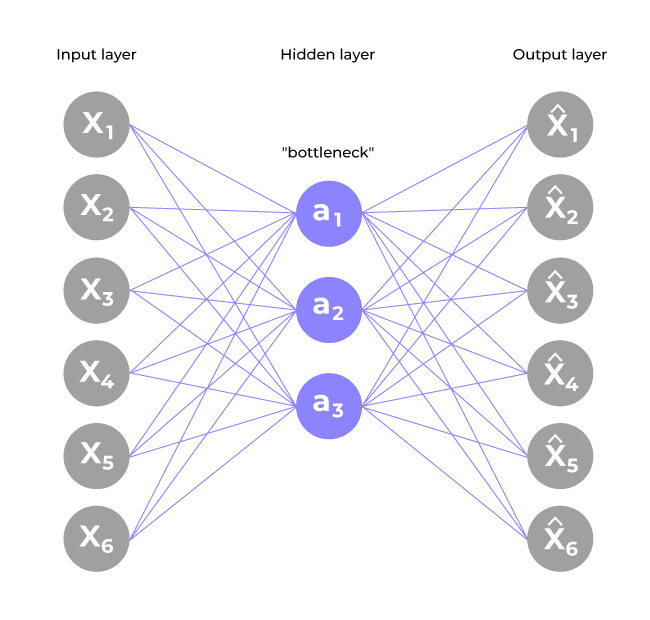


## 4️ How it Works
1. Input image is fed to **encoder** → latent vector generated  
2. Latent vector passed to **decoder** → reconstructed image output  
3. **Loss function** compares input and reconstructed image (commonly **MSE loss**)  
4. Network **learns weights** to minimize reconstruction error 🏋️‍♂️


## 5️ Applications
- **Image denoising**: Remove noise from images 🧹
- **Dimensionality reduction**: Compress images into smaller representations 📦
- **Anomaly detection**: Detect unusual patterns in images ⚠️
- **Feature extraction**: Preprocessing for other ML tasks 🌟


## 6️ Key Points to Remember
- CNN autoencoders are **unsupervised** models  
- Works **best with image data** due to spatial correlation handling  
- Encoder reduces dimensionality, Decoder reconstructs data  
- Loss function: usually **Mean Squared Error (MSE)**  
- Output quality depends on **network depth, filter size, and training data**

Epoch [1/5], Loss: 0.0086
Epoch [2/5], Loss: 0.0054
Epoch [3/5], Loss: 0.0041
Epoch [4/5], Loss: 0.0037
Epoch [5/5], Loss: 0.0028


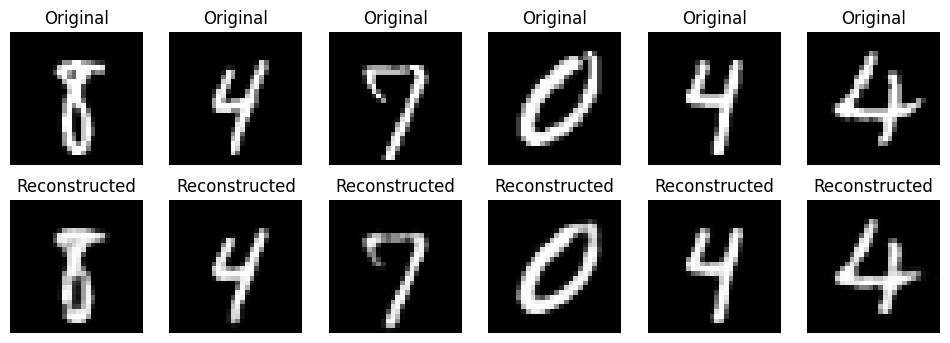

In [1]:
# -----------------------------
# 1️ Import Libraries
# -----------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 2️ Define CNN Autoencoder
# -----------------------------
class CNNAutoencoder(nn.Module):
    def __init__(self):
        super(CNNAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), 
            nn.ReLU(True),
            nn.Conv2d(32, 64, 7)                        
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),         
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), 
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  
            nn.Sigmoid()  
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# -----------------------------
# 3️ Prepare Dataset (MNIST)
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# -----------------------------
# 4️ Initialize Model, Loss, Optimizer
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# -----------------------------
# 5️ Train Autoencoder
# -----------------------------
num_epochs = 5

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.to(device)
        
        # Forward pass
        output = model(img)
        loss = criterion(output, img)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# -----------------------------
# 6️ Visualize Results
# -----------------------------
dataiter = iter(train_loader)
images, _ = next(dataiter)
images = images.to(device)
output = model(images)

# Take first 6 images
fig, axes = plt.subplots(2, 6, figsize=(12,4))
for i in range(6):
    axes[0,i].imshow(images[i].cpu().squeeze(), cmap='gray')
    axes[0,i].set_title("Original")
    axes[0,i].axis('off')
    
    axes[1,i].imshow(output[i].detach().cpu().squeeze(), cmap='gray')
    axes[1,i].set_title("Reconstructed")
    axes[1,i].axis('off')

plt.show()

# 🖼️ Semantic Segmentation and🎯 Object Detection

## 🔑 Key Takeaways
-  **Semantic segmentation** → Labels every pixel → gives fine object boundaries.  
-  **Object detection** → Finds objects + bounding boxes → faster but less detailed.  
-  Choosing depends on *why* you need it (detail vs speed) and *where* you apply it.  


## 🧩 What is Segmentation?

- **Definition**: Dividing an image into meaningful regions.  
- **Types**:  
  -  **Semantic Segmentation** → All pixels of a class are grouped (cars, trees, roads).  
  -  **Instance Segmentation** → Each object instance is separated (Car 1, Car 2, Car 3).  

**Why?**
- Needed when *precise object shape/area* matters.  
- Helps measure, analyze, or understand structure pixel-by-pixel.  

**Where?**
-  Medical imaging → tumor/organ boundaries.  
-  Manufacturing → detect surface defects.  
-  Robotics → navigation with pixel-level maps.  


## 🎯 What is Object Detection?

- **Definition**: Finds where objects are + assigns class → bounding boxes.  
- **How?**
  - Region Proposal Networks (RPNs).  
  - Feature extraction networks (CNNs).  

**Why?**
- Fast & efficient → useful for real-time tasks.  
- Good for counting, monitoring, and alerts.  

**Where?**
-  Surveillance → detect people, vehicles.  
-  Agriculture → detect crops/pests.  
-  Retail → product placement, customer tracking.  


## 🏷️ Classification (for context)

- **Definition**: Assigns a label to an entire image (no location/shape info).  

**Why?**
- Simplest → when you only need to *know what* is in the image.  

**Where?**
-  Image tagging.  
-  Disease detection from medical scans.  


## 🔍 Comparative Analysis

| Technique              | Output                         | Why ❓                                               | Where 📍                                  |
|-------------------------|--------------------------------|------------------------------------------------------|-------------------------------------------|
| 🖌️ Semantic Segmentation   | Pixel-wise class labels        | When exact shape/boundary is important               | Medical imaging, defect detection, robotics |
| 🎯 Object Detection        | Bounding boxes + class labels | When speed & rough location is enough                | Surveillance, agriculture, retail           |
| 🏷️ Classification          | Image/region class labels     | When you just need to know *what* is in the image    | Tagging, disease diagnosis                  |


## ⚖️ Choosing Between Them

- **Segmentation** 🖌️ →  
  - Why: High detail, shape, and overlap handling.  
  - Where: Medicine, robotics, scientific analysis.  

- **Detection** 🎯 →  
  - Why: Efficiency, counting, real-time alerts.  
  - Where: Surveillance, self-driving cars, retail.  


## ⚡ Popular Architectures

- **YOLO (You Only Look Once)** 🚀  
  - Why: Real-time detection.  
  - Where: Traffic monitoring, live video analytics.  

- **RetinaNet** 👁️  
  - Why: High accuracy on small objects.  
  - Where: Drone imagery, detailed surveillance.  


## 🔗 Combined / Fusion Approaches

- Many real apps mix both:  
  - 🚗 **Autonomous driving** →  
    - Segmentation: drivable area, lanes.  
    - Detection: pedestrians, vehicles.  
    - Classification: traffic sign type.  


## ❓ FAQ

- **Semantic Segmentation?**  
  Pixel-level labeling.  
- **Object Detection?**  
  Bounding box + class.  
- **When to use which?**  
  - Shape → segmentation.  
  - Location/speed → detection.  
  - Broad category → classification.  


## ✅ Conclusion

- 🖌️ Use **Segmentation** when detail matters.  
- 🎯 Use **Detection** when speed + approximate location is enough.  
- 🏷️ Use **Classification** when only content matters.  
- 🔗 Often → combining them gives best results.  


# 📘 R-CNN (Region-Based Convolutional Neural Networks)

## What is R-CNN

- “R-CNN” stands for **Regions with CNN features**.  
- It addresses object detection by combining region proposals + deep CNNs.  


## R-CNN Workflow / How it Works

1. **Input Image**  
   Start with an image that may contain one or more objects.  

2. **Region Proposal Generation**  
   - Use Selective Search to generate ~2000 region proposals (candidate regions likely to have objects).  
   - This reduces search space vs sliding windows.  

3. **Warp & Feature Extraction**  
   - Each proposed region is cropped & **warped** (resized) to a fixed size (e.g. the input size required by a CNN like AlexNet).  
   - These regions are then passed independently through a CNN to produce feature vectors.  

4. **Classification (SVMs)**  
   - Each region’s feature vector is classified (which class or background) using Support Vector Machines (one SVM per class).  

5. **Bounding Box Regression**  
   - A bounding box regressor refines the proposals: predicts better bounding box coordinates (x, y, width, height).  

6. **Non-Maximum Suppression (NMS)**  
   - After scoring proposals, low confidence ones are removed.  
   - Among overlapping boxes (high IoU > certain threshold), keep the best and discard others.
     
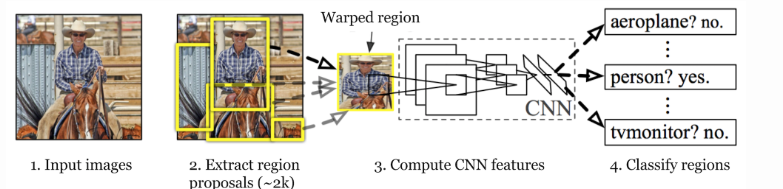

## Key Features of R-CNN

- **Selective Search** for region proposals.  
- **CNN feature extraction** per proposal region.  
- **Use of SVMs**: separate classifiers trained for object vs background.  
- **Bounding box regression** for better localization.  


## Performance & Limitations

- **mAP Scores**  
  - On PASCAL VOC 2010: ~53.7% mAP.  
  - On ILSVRC 2013 (200 classes): ~31.4% mAP.  

- **Drawbacks / Challenges**  
  1. Training is slow: ~2000 region proposals → each needs CNN feature extraction.  
  2. Not real-time: inference is very slow (~49 sec per image in early tests).  
  3. High memory/storage: storing feature maps for all proposals.  
  4. Region proposal method (Selective Search) is fixed and not learnable.  


## Evolution / Related Models

- **Fast R-CNN**  
  - Shares convolutional features for all proposals (process full image once).  
  - Uses a softmax classifier instead of separate SVMs.  

- **Faster R-CNN**  
  - Introduces Region Proposal Network (RPN) to generate proposals directly from feature maps.  

- **Mask R-CNN**  
  - Adds segmentation mask prediction branch.  
  - Introduces RoIAlign for better accuracy in localization.  


## Applications

- 🚗 Autonomous Vehicles → detecting cars, pedestrians, traffic signs.  
- 🎥 Surveillance Systems → recognizing and locating people/objects.  
- 🏥 Medical Imaging → locating anomalies in scans.  
- 🕶️ Augmented Reality → object recognition, overlaying information.  


## Why & When to Use R-CNN 🧐

- **Why**: R-CNN was one of the first models to combine region proposals with CNN features, significantly improving object detection accuracy.  
- **When**:  
  - When accuracy matters more than speed.  
  - In research/prototyping tasks.  
  - On datasets where computational cost is acceptable.  


## Summary

- R-CNN combines region proposals + CNN features + classification + bounding box regression.  
- Foundation for later, faster, more accurate models.  
- High accuracy but slow, memory-heavy, and not suitable for real-time applications.  

In [2]:
!pip uninstall opencv-python -y
!pip install opencv-contrib-python

Extracted features: 20
 R-CNN demo finished


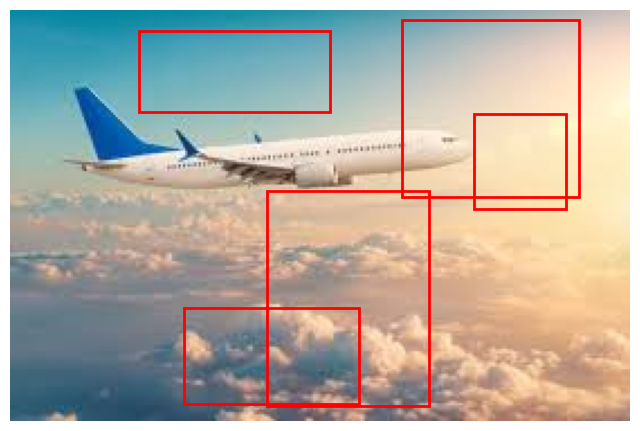

In [3]:
# --- R-CNN ---
import torch
import torchvision.models as models
import torchvision.transforms as T
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.models import resnet18, ResNet18_Weights

# Load pretrained ResNet18 with recommended syntax
resnet = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # remove last FC
resnet.eval()

# Image transform
transform = T.Compose([
    T.Resize((128,128)),   # smaller for speed
    T.ToTensor(),
])

# Loading image
image_path = "download.jpg" 
img_pil = Image.open(image_path).convert("RGB")
img_rgb = np.array(img_pil)

# --- Generate random region proposals (for demo purposes) ---
h, w, _ = img_rgb.shape
rects = []
for _ in range(20):   # 20 random regions
    x = np.random.randint(0, w-50)
    y = np.random.randint(0, h-50)
    rw = np.random.randint(30, min(100, w-x))
    rh = np.random.randint(30, min(100, h-y))
    rects.append((x, y, rw, rh))

# Extract CNN features for proposals
features, proposals = [], []
for (x, y, rw, rh) in rects:
    roi = img_rgb[y:y+rh, x:x+rw]
    roi_pil = Image.fromarray(roi).resize((128,128))
    roi_tensor = transform(roi_pil).unsqueeze(0)
    with torch.no_grad():
        feat = resnet(roi_tensor).flatten().numpy()
    features.append(feat)
    proposals.append((x, y, rw, rh))

print("Extracted features:", len(features))

# Dummy SVM classifier (binary for demo)
labels = [0 if i%2==0 else 1 for i in range(len(features))]
svm = SVC(kernel='linear')
svm.fit(features, labels)
print(" R-CNN demo finished")

# --- Visualization of first 5 proposals ---
plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
for (x, y, rw, rh) in proposals[:5]:
    plt.gca().add_patch(plt.Rectangle((x,y), rw, rh, fill=False, edgecolor='red', linewidth=2))
plt.axis("off")
plt.show()

# 🚀 Faster R-CNN 

## 🔍 What is Faster R-CNN

- Two-stage object detector: 
  1. **Stage 1**: Propose regions that might contain objects (Region Proposal Network, RPN)  
  2. **Stage 2**: Use those proposals to classify objects + refine bounding boxes  

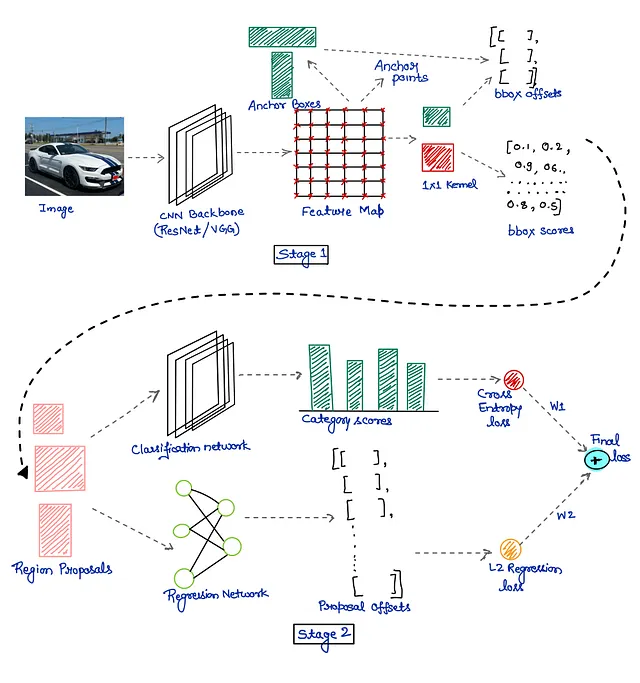
## 🏗 Architecture Overview

### Stage 1: Region Proposal Network (RPN)

- **Backbone Network**: CNN like ResNet or VGG extracts feature map from the input image.  
- **Anchors**: A set of default boxes of various sizes & aspect ratios at each point of the feature map.  
- **Anchor Classification**: Each anchor → either background or foreground (object) based on overlap with ground truth.  
- **Bounding Box Refinement**: Predict offsets for anchors to better align them with real object boxes.  
- **Losses**:  
  - Classification loss (foreground vs background)  
  - Regression loss (anchor → object bounding box refinement)  


### Stage 2: Object Classification & Box Refinement

- **Region Proposals** (from RPN) are taken, and prepared for uniform input (fixed size) using **ROI Pooling** (or ROI Align).  
- Each proposal is classified into object categories (or background).  
- Bounding box regression again to adjust the proposed boxes more precisely.  
- **Multi-Task Learning**: The network at this stage simultaneously optimizes classification + bounding box regression.  


## ⚙️ Inference & Training

- **Inference (Testing)**:  
  - Generate many region proposals, but only keep top ones (with highest objectness scores).  
  - Pass proposals through the second stage to get class + refined box.  
  - Apply Non-Maximum Suppression (NMS) to remove overlapping duplicates.  

- **Training Variants**:  
  1. **Stage-wise**: train RPN first, then fix it and train classifier/regressor.  
  2. **End-to-end**: train RPN + second stage together (jointly)  

In [4]:
# --- Faster R-CNN using PyTorch ---
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn(weights=weights)
model.eval()

# Load and preprocess image
img_path = "download.jpg"
image = Image.open(img_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
img_tensor = transform(image)

# Run inference
with torch.no_grad():
    predictions = model([img_tensor])

print("Predicted Boxes:", predictions[0]['boxes'][:2])
print("Predicted Labels:", predictions[0]['labels'][:2])
print("Scores:", predictions[0]['scores'][:2])

Predicted Boxes: tensor([[ 26.7284,  36.9363, 198.1384,  81.6857],
        [ 10.3300,  30.5874, 237.0595, 155.6503]])
Predicted Labels: tensor([5, 5])
Scores: tensor([0.9850, 0.3738])


# 📦 Single Shot MultiBox Detector (SSD) in Object Detection

## 🚀 What is SSD?

- **SSD** is a real-time object detection algorithm that identifies and locates multiple objects in images in a single forward pass of the network. 🖼️
- It simplifies the detection process by eliminating the need for a separate region proposal network, making it faster than two-stage detectors like Faster R-CNN. ⚡


## 🧠 How Does SSD Work?

1. **Base Network**: SSD uses a pre-trained convolutional neural network (CNN), such as VGG16, to extract feature maps from the input image. 
2. **Additional Convolutional Layers**: These layers are added to the base network to detect objects at multiple scales. 
3. **Default Boxes**: SSD employs default boxes of different aspect ratios and scales at each feature map location. 
4. **Predictions**: For each default box, SSD predicts:
   - Class scores (probabilities of object classes) 
   - Bounding box offsets (adjustments to the default box to fit the object) 
5. **Loss Function**: The combined loss function includes:
   - Localization loss (for bounding box accuracy) 
   - Confidence loss (for class prediction accuracy) 
6. **Non-Maximum Suppression (NMS)**: After generating predictions, NMS is applied to eliminate redundant boxes and retain the most confident detections. 


## ⚙️ SSD Architecture Overview

- **Base Network**: Utilizes a pre-trained CNN like VGG16 for feature extraction. 
- **Extra Convolutional Layers**: These layers detect objects at multiple scales. 
- **Default Boxes**: Predefined boxes of various sizes and aspect ratios are used to match objects in the image. 
- **Prediction Layers**: Each feature map location predicts class scores and bounding box offsets. 
- **Loss Function**: Combines localization and confidence losses to train the model. 
- **Post-Processing**: Applies NMS to refine the final detections. 

                                                   
## 🌟 Advantages of SSD

- **Speed**: SSD performs detection in a single pass, making it faster than two-stage detectors like Faster R-CNN. 
- **Simplicity**: The architecture is straightforward, simplifying the detection process. 
- **Accuracy**: Achieves competitive accuracy, especially for large objects, due to its multi-scale approach. 

                                                   
## 🛠️ Applications of SSD

- **Autonomous Driving**: Detecting vehicles, pedestrians, and traffic signs in real-time. 
- **Surveillance**: Monitoring and identifying objects or individuals in security footage.
- **Robotics**: Enabling robots to perceive and interact with their environment. 
- **Augmented Reality**: Detecting and tracking objects for interactive experiences. 


## ⚠️ Limitations of SSD

- **Small Object Detection**: SSD may struggle with detecting small objects due to its default box sizes. 
- **Accuracy**: While fast, SSD may not achieve the same level of accuracy as two-stage detectors like Faster R-CNN. 
- **Complexity**: The architecture can be complex to implement and fine-tune. 

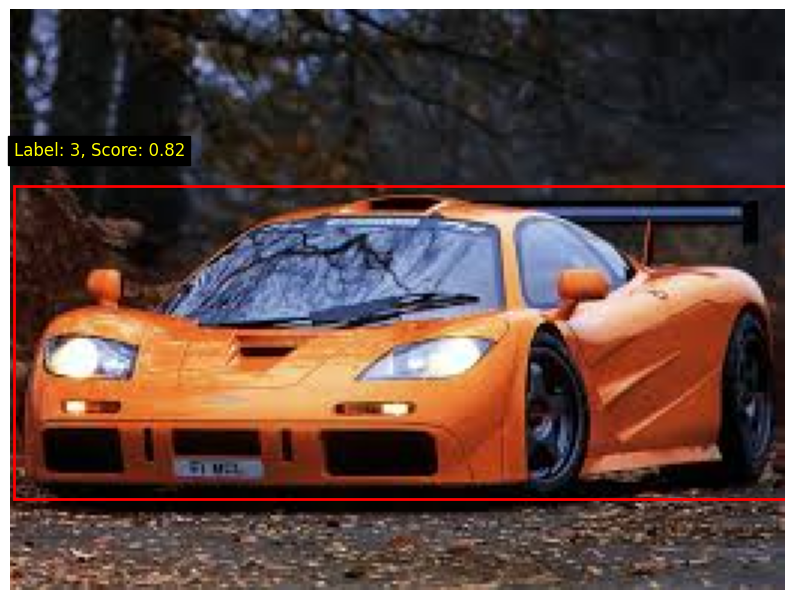

In [14]:
import torch
import torchvision
from torchvision import transforms
from torchvision.models.detection import ssd300_vgg16, SSD300_VGG16_Weights
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1. Load Pretrained SSD Model 
weights = SSD300_VGG16_Weights.DEFAULT
model = ssd300_vgg16(weights=weights)
model.eval()

# 2. Load and Preprocess Image
img_path = "mac.jpg"  # Replace with your image path
image = Image.open(img_path).convert("RGB")

# Use weights transforms (better preprocessing)
transform = weights.transforms()
img_tensor = transform(image).unsqueeze(0)

# 3. Run Inference
with torch.no_grad():
    outputs = model(img_tensor)

boxes = outputs[0]['boxes']
labels = outputs[0]['labels']
scores = outputs[0]['scores']

# 4. Visualize Results
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

threshold = 0.5
for i in range(len(boxes)):
    if scores[i] > threshold:
        x1, y1, x2, y2 = boxes[i]
        rect = patches.Rectangle(
            (x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(
            x1, y1-10,
            f"Label: {labels[i].item()}, Score: {scores[i]:.2f}",
            color='yellow', fontsize=12, backgroundcolor='black'
        )

plt.axis('off')
plt.show()

# 🧠 U-Net Architecture

U-Net is a deep learning model primarily used for **image segmentation**, which involves dividing an image into different parts to identify specific objects. It's especially effective in medical imaging tasks, such as separating a tumor from healthy tissue in a medical scan.

## 🏗️ U-Net Architecture Overview

The architecture is symmetric and consists of three key components:

### 1. Contracting Path (Encoder) 🔽

- **Convolutional Layers**: Use small filters (3×3 pixels) to scan the image and extract features.
- **ReLU Activation**: Applies the ReLU activation function to introduce non-linearity, helping the model learn complex patterns.
- **Max Pooling**: Uses 2×2 filters to reduce the image size while retaining important information, allowing the network to focus on larger features.

### 2. Bottleneck 🔁

- The central part of the "U" where the most compressed and abstract information is stored.
- Acts as a bridge between the encoder and decoder.

### 3. Expansive Path (Decoder) 🔼

- **Upsampling**: Increases the image size to recover the original dimensions.
- **Skip Connections**: Combines information from the encoder to retain spatial details that might have been lost during downsampling.
- **Convolutional Layers**: Further processes the combined information to refine the output.

## 🖼️ U-Net Architecture Diagram

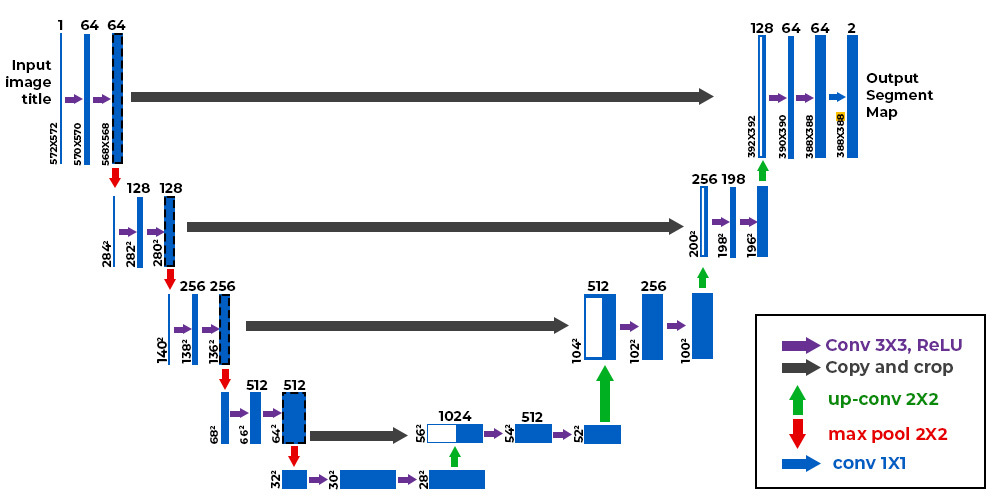

## 🧪 How U-Net Works

1. **Input Image**: A medical or grayscale image is fed into the network.
2. **Feature Extraction (Encoder)**: The encoder extracts increasingly abstract features by applying convolutions and downsampling. As the spatial size decreases, the number of feature channels increases, capturing higher-level patterns.
3. **Bottleneck Processing**: The image is reduced to its most essential features, holding a compact representation.
4. **Reconstruction and Localization (Decoder)**: The decoder reconstructs the original image size through upsampling, combining decoder features with corresponding encoder features using skip connections to retain fine-grained spatial details.
5. **Skip Connections for Precision**: These connections help preserve spatial accuracy by bringing forward detailed features from earlier layers, crucial for distinguishing boundaries in segmentation tasks.
6. **Final Prediction**: A 1×1 convolution at the end converts the refined feature maps into the final segmentation map, where each pixel is classified into a specific class like foreground or background. This output matches the input image's spatial resolution.

## 💡 Key Features of U-Net

- **Symmetric Architecture**: Ensures that the encoder and decoder paths are mirror images, preserving spatial information throughout the network.
- **Skip Connections**: Allow the network to utilize both high-level (contextual) and low-level (spatial) features, improving segmentation accuracy.
- **Efficient Training**: Can be trained end-to-end with relatively few images, making it suitable for applications with limited annotated data.

## 🧬 Applications of U-Net

- **Medical Image Segmentation**: Identifying organs, tumors, or other structures in medical scans.
- **Satellite and Aerial Imagery Analysis**: Detecting land use, vegetation, or urban areas from satellite images.
- **Environmental Monitoring**: Tracking changes in ecosystems or natural disasters.
- **Automated Quality Control**: Inspecting products in manufacturing processes.
- **Object Detection in Autonomous Vehicles**: Recognizing obstacles or road signs.

## 🔄 U-Net vs. U-Net++

U-Net++ is an extension of the original U-Net architecture, introducing:

- **Nested Skip Connections**: Bridges the semantic gap between encoder and decoder feature maps, enhancing the model's ability to capture fine details.
- **Deep Supervision**: Applies supervision at multiple levels within the network, improving gradient flow and model convergence.

Epoch 1, Loss: 0.6932
Epoch 2, Loss: 0.6931
Epoch 3, Loss: 0.6931


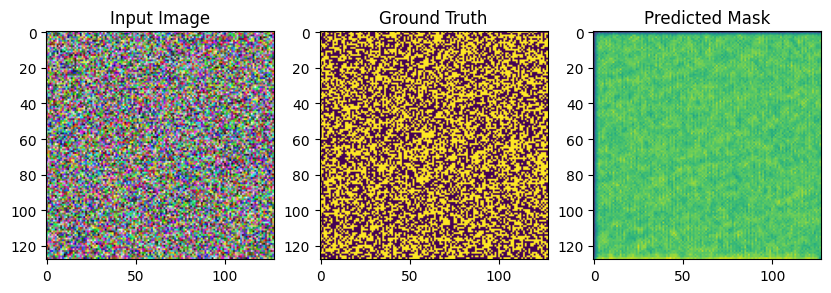

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# --- Corrected U-Net ---
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()
        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(in_channels, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.pool1 = nn.MaxPool2d(2)

        self.enc2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.pool2 = nn.MaxPool2d(2)

        # Bottleneck
        self.bottleneck = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(inplace=True)
        )

        # Decoder
        self.upconv2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = nn.Sequential(
            nn.Conv2d(256, 128, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(inplace=True)
        )

        self.upconv1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = nn.Sequential(
            nn.Conv2d(128, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(inplace=True)
        )

        # Final output
        self.final = nn.Conv2d(64, out_channels, 1)

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))

        # Bottleneck
        b = self.bottleneck(self.pool2(e2))

        # Decoder
        d2 = self.upconv2(b)
        d2 = torch.cat([d2, e2], dim=1)  # skip connection
        d2 = self.dec2(d2)

        d1 = self.upconv1(d2)
        d1 = torch.cat([d1, e1], dim=1)  # skip connection
        d1 = self.dec1(d1)

        out = self.final(d1)
        return out

# --- Dummy dataset ---
class DummyDataset(Dataset):
    def __init__(self, num_samples=20, image_size=128):
        self.num_samples = num_samples
        self.image_size = image_size
        self.transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor()
        ])

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        img = np.random.randint(0, 255, (self.image_size, self.image_size, 3), dtype=np.uint8)
        mask = np.random.randint(0, 2, (self.image_size, self.image_size), dtype=np.uint8)
        return self.transform(Image.fromarray(img)), torch.tensor(mask, dtype=torch.float32)

# --- Setup ---
dataset = DummyDataset()
loader = DataLoader(dataset, batch_size=4, shuffle=True)
model = UNet()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training loop ---
for epoch in range(3):
    for imgs, masks in loader:
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs.squeeze(1), masks)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# --- Visualize ---
model.eval()
with torch.no_grad():
    sample_img, sample_mask = dataset[0]
    output = torch.sigmoid(model(sample_img.unsqueeze(0))).squeeze().numpy()

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(sample_img.permute(1,2,0)); plt.title("Input Image")
plt.subplot(1,3,2); plt.imshow(sample_mask); plt.title("Ground Truth")
plt.subplot(1,3,3); plt.imshow(output); plt.title("Predicted Mask")
plt.show()

# 🖼️ Mask R-CNN 

Mask R-CNN is a powerful deep learning model used for **instance segmentation**, which detects objects in an image and also generates a **pixel-wise mask** for each object.


## 🧠 What is Mask R-CNN?

- Extends **Faster R-CNN** by adding a branch for predicting object masks.
- Performs **instance segmentation**, distinguishing between multiple objects of the same class.
- Produces **bounding boxes**, **class labels**, and **segmentation masks** simultaneously.


## 🔑 Key Concepts

- **Instance Segmentation**: Identifies and segments each object instance separately.
- **Semantic Segmentation**: Labels each pixel with a class but does **not** differentiate between instances.
- **Region of Interest (RoI)**: Proposed regions where objects are likely to exist.
- **Mask Branch**: A fully convolutional network that predicts a binary mask for each RoI.

                                                                            
## 🛠️ Steps to Implement Mask R-CNN

1. **Clone the repository**:
   - `git clone https://github.com/matterport/Mask_RCNN.git`
2. **Install dependencies**:
   - `numpy`, `scipy`, `Pillow`, `cython`, `matplotlib`, `scikit-image`, `tensorflow`, `keras`, `opencv-python`, `h5py`, `imgaug`, `IPython`.
3. **Download pre-trained weights**:
   - Use weights trained on the **MS COCO dataset**.
4. **Load and preprocess your image**:
   - Convert image to **RGB** and resize if necessary.
5. **Run detection**:
   - Feed the image into the Mask R-CNN model.
6. **Visualize results**:
   - Display **bounding boxes**, **class labels**, and **segmentation masks**.

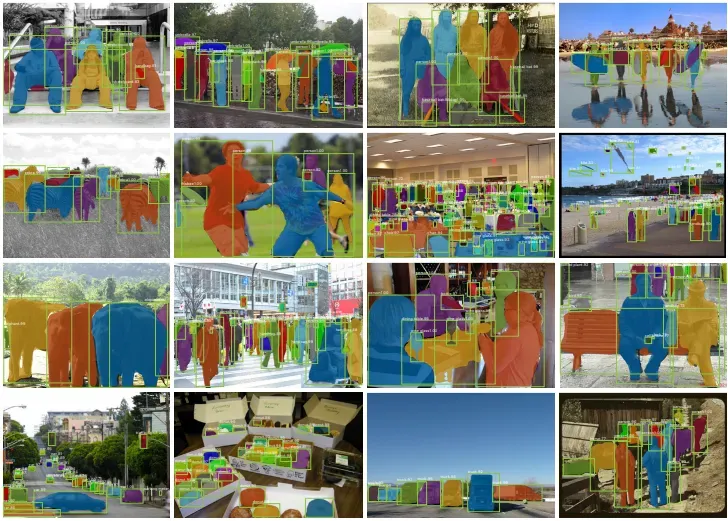
## 💡 Advantages of Mask R-CNN

- Handles **multiple objects of the same class**.
- Provides **pixel-level segmentation**, not just bounding boxes.
- Extends Faster R-CNN without losing **accuracy or speed**.
- Can be fine-tuned for **custom datasets**.


## 🧩 Applications

- **Medical Imaging**: Tumor or organ segmentation.
- **Autonomous Vehicles**: Detecting pedestrians, vehicles, and obstacles.
- **Agriculture**: Crop and weed detection.
- **Video Surveillance**: Tracking multiple objects in real-time.
- **Robotics**: Object manipulation and scene understanding.


## ⚡ Key Points to Remember

- Mask R-CNN = Faster R-CNN + **Mask Branch** ✅
- Predicts **boxes, classes, and masks** simultaneously.
- Requires **pre-trained weights** for practical usage.
- Can be customized for **specific datasets**.

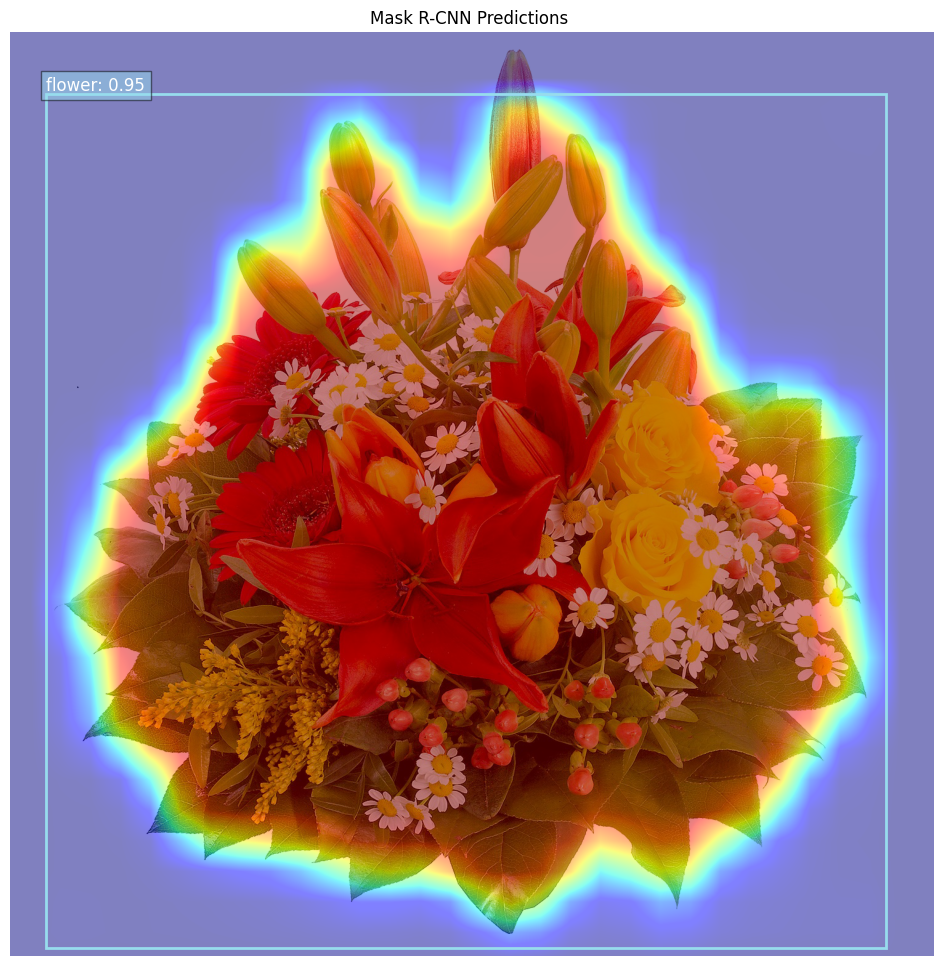

Top Detected Objects 
flower: 0.95


In [15]:
# -----------------------------
# 1️ Import Libraries
# -----------------------------
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import random

# -----------------------------
# 2️  Class Names
# -----------------------------
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
    'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'flower', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]

# -----------------------------
# 3️ Load Pretrained Model
# -----------------------------
weights = MaskRCNN_ResNet50_FPN_Weights.COCO_V1
model = maskrcnn_resnet50_fpn(weights=weights)
model.eval()

# -----------------------------
# 4️ Load and Preprocess Image
# -----------------------------
image_path = "flower.png"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
transform = weights.transforms()
img_tensor = transform(image)

# -----------------------------
# 5️ Run Inference 
# -----------------------------
with torch.no_grad():
    predictions = model([img_tensor])[0]

# -----------------------------
# 6️ Visualize Results
# -----------------------------
image_np = np.array(image)
fig, ax = plt.subplots(1, figsize=(12,12))
ax.imshow(image_np)

threshold = 0.5  # Confidence threshold

for i, score in enumerate(predictions['scores']):
    if score > threshold:
        box = predictions['boxes'][i].numpy()
        mask = predictions['masks'][i,0].numpy()
        label = COCO_INSTANCE_CATEGORY_NAMES[predictions['labels'][i]]
        color = (random.random(), random.random(), random.random())  # random color

        # Draw bounding box
        ax.add_patch(plt.Rectangle(
            (box[0], box[1]),
            box[2]-box[0],
            box[3]-box[1],
            fill=False, color=color, linewidth=2
        ))

        # Overlay mask
        ax.imshow(mask, alpha=0.5, cmap='jet')

        # Add label text
        ax.text(box[0], box[1]-5, f"{label}: {score:.2f}", color='white', fontsize=12,
                bbox=dict(facecolor=color, alpha=0.5))

plt.title("Mask R-CNN Predictions ")
plt.axis('off')
plt.show()

# -----------------------------
# 7️ Print Top Predictions
# -----------------------------
print("Top Detected Objects ")
for i, score in enumerate(predictions['scores']):
    if score > threshold:
        label = COCO_INSTANCE_CATEGORY_NAMES[predictions['labels'][i]]
        print(f"{label}: {score:.2f}")

# 🧠 Generative Adversarial Networks (GANs)

Generative Adversarial Networks (GANs) were introduced by Ian Goodfellow in 2014.  
They consist of two neural networks—a **Generator** and a **Discriminator**—that compete against each other to create realistic data.  
GANs are primarily used for **unsupervised learning tasks**.  


# 🔧 GAN Architecture

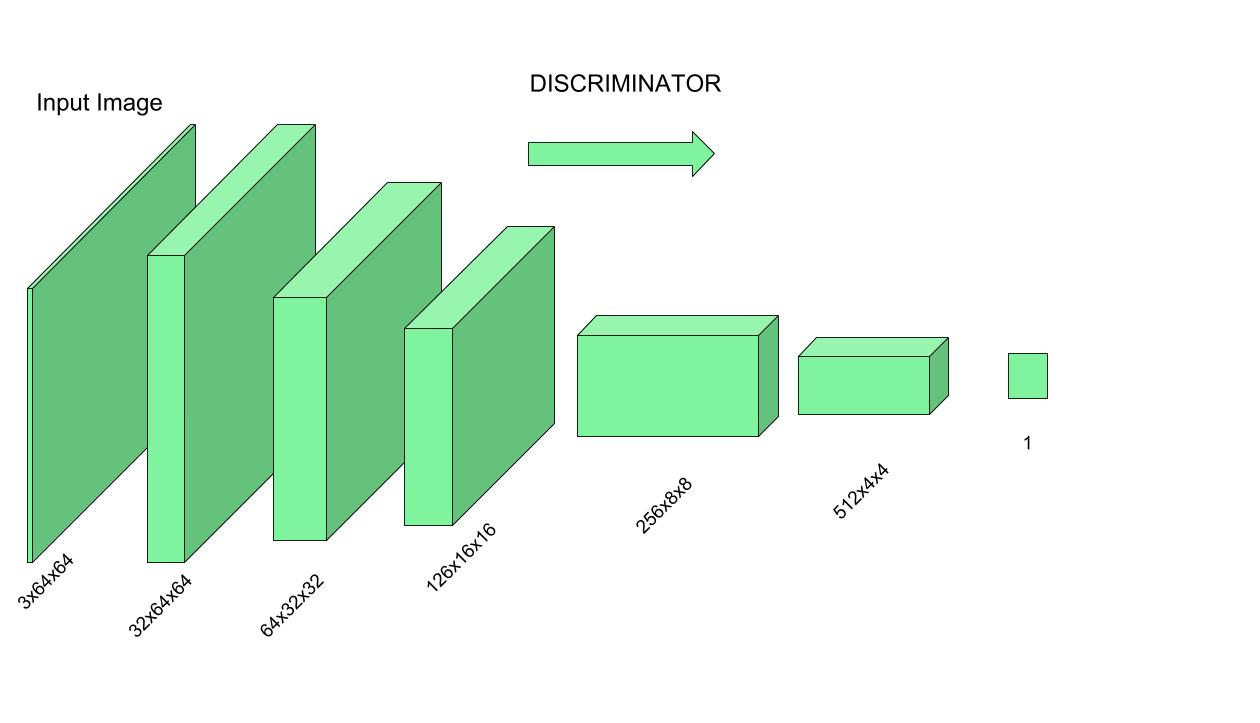

**Generator**  
- **Function:** Creates synthetic data from random noise.  
- **Goal:** Produce data indistinguishable from real data.
- 
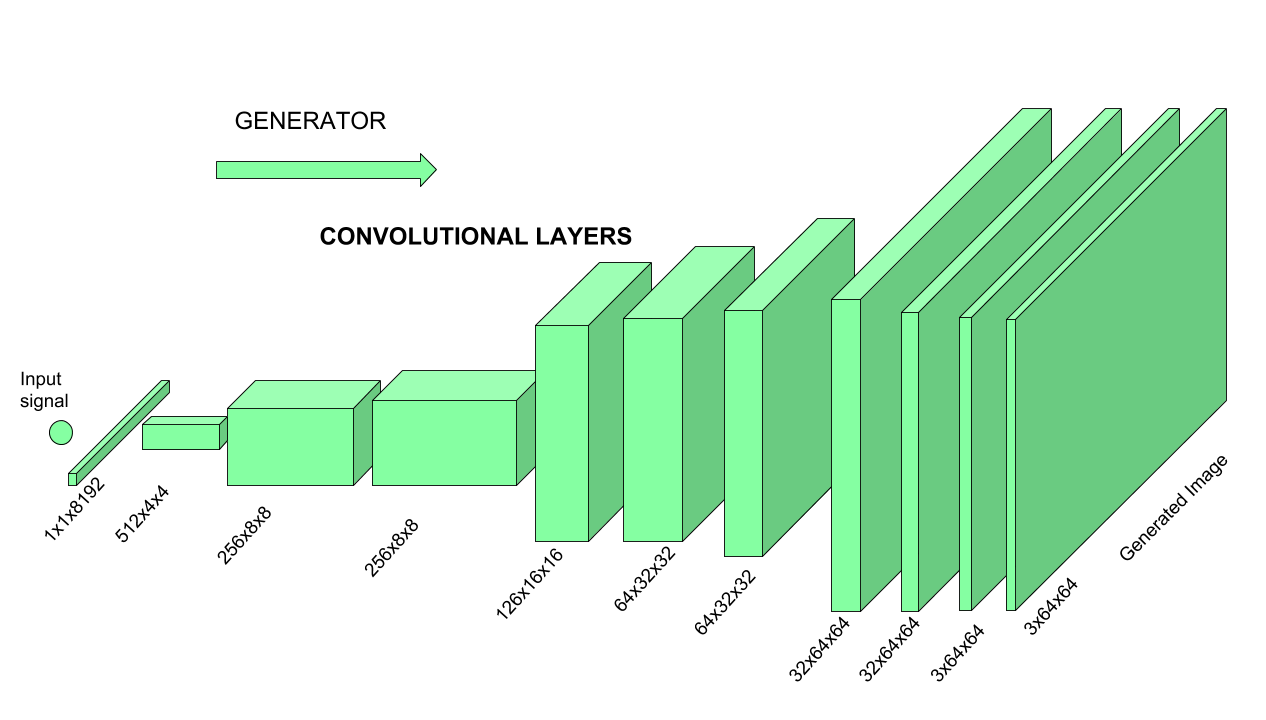

**Discriminator**  
- **Function:** Evaluates data and classifies it as real or fake.  
- **Goal:** Correctly identify whether data is real or generated. 


# ⚙️ Training Process

The training process involves a **minimax game**:  

- **Generator:** Minimizes the probability of the Discriminator correctly identifying fake data.  
- **Discriminator:** Maximizes its ability to distinguish real from fake data.  

This adversarial process leads to the Generator producing **increasingly realistic data** over time. 


# 🌍 Applications of GANs

- **Image Generation:** Creating realistic images from random noise.  
- **Text-to-Image Synthesis:** Generating images from textual descriptions.  
- **Data Augmentation:** Enhancing datasets for training machine learning models.   
- **Art and Creativity:** Assisting in the creation of digital art and music.   


# ✅ Advantages of GANs

- **High-Quality Data Generation:** Produces realistic data samples.   
- **Unsupervised Learning:** Does not require labeled data. 
- **Versatility:** Applicable in various domains such as art, healthcare, and gaming.   


# ⚠️ Challenges and Limitations

- **Training Instability:** Can be difficult to train effectively.   
- **Mode Collapse:** Generator may produce limited varieties of outputs.   
- **Evaluation Metrics:** Lack of standardized metrics for assessing generated data quality. 

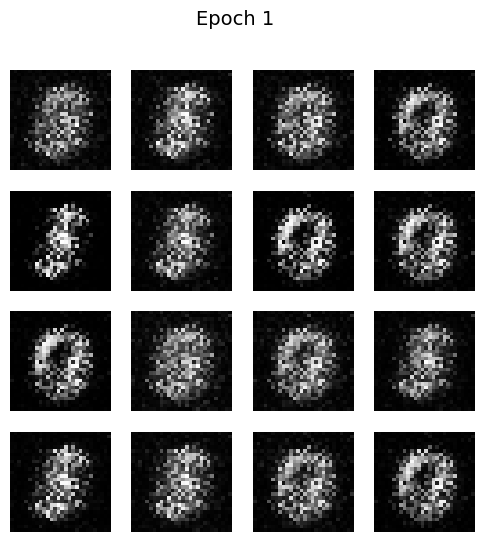

Epoch [1/5]  Loss_D: 1.2042, Loss_G: 1.1891


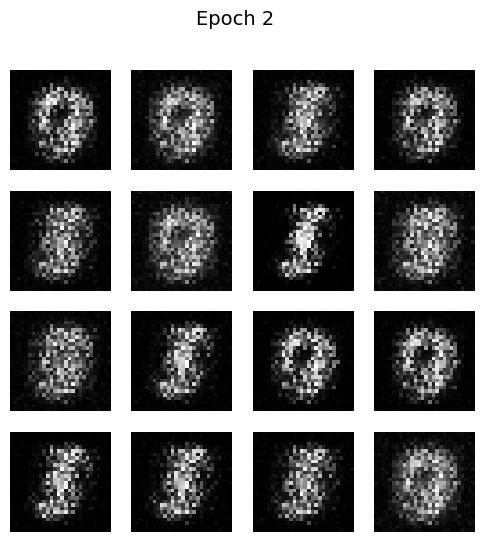

Epoch [2/5]  Loss_D: 1.0387, Loss_G: 1.0364


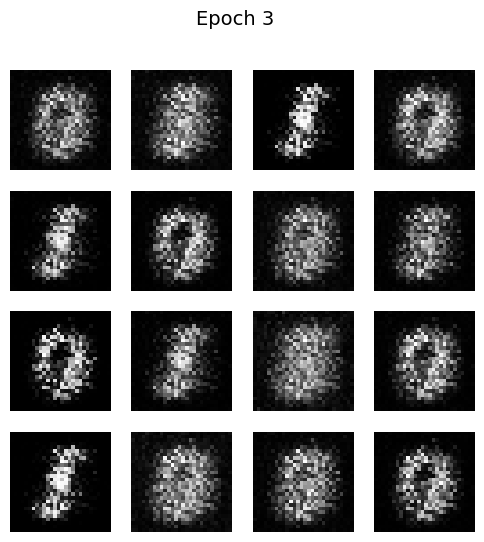

Epoch [3/5]  Loss_D: 1.0399, Loss_G: 1.1579


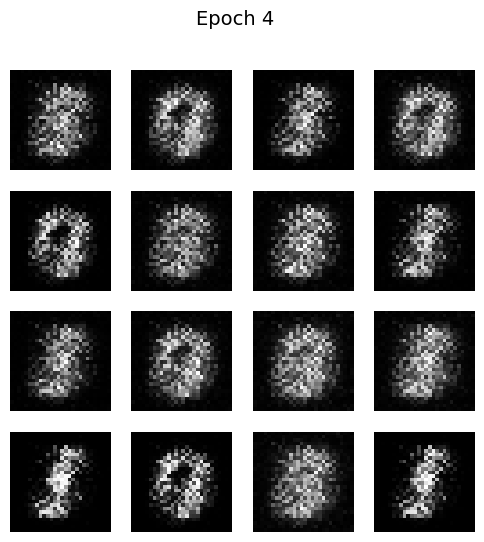

Epoch [4/5]  Loss_D: 0.6873, Loss_G: 1.1967


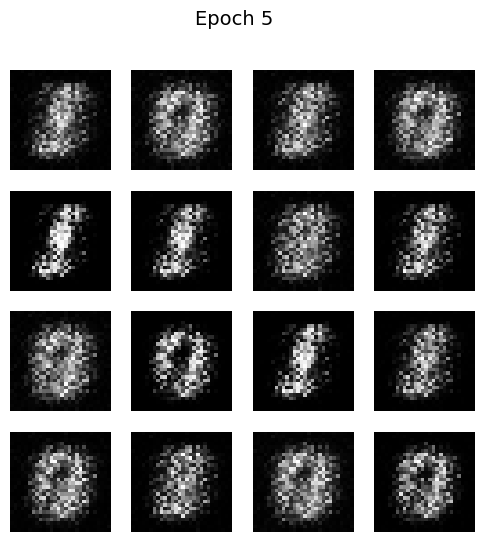

Epoch [5/5]  Loss_D: 1.0411, Loss_G: 1.1267
✅ Training Finished! Generator can now create digits.


In [10]:
import matplotlib.pyplot as plt

# Training Loop
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        batch_size = real_imgs.size(0)

        # Labels for real (1) and fake (0)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # --------------------
        # Train Discriminator
        # --------------------
        optimizer_D.zero_grad()
        outputs = D(real_imgs)
        loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, latent_dim)
        fake_imgs = G(z)
        outputs = D(fake_imgs.detach())
        loss_fake = criterion(outputs, fake_labels)

        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        # ----------------
        # Train Generator
        # ----------------
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim)
        fake_imgs = G(z)
        outputs = D(fake_imgs)

        loss_G = criterion(outputs, real_labels)
        loss_G.backward()
        optimizer_G.step()

    #  Show generated images after each epoch
    with torch.no_grad():
        z = torch.randn(16, latent_dim)   # generate 16 images
        sample_imgs = G(z).view(-1, 1, 28, 28)

        plt.figure(figsize=(6, 6))
        for k in range(16):
            plt.subplot(4, 4, k+1)
            plt.imshow(sample_imgs[k][0].cpu(), cmap="gray")
            plt.axis("off")
        plt.suptitle(f"Epoch {epoch+1}", fontsize=14)
        plt.show()

    print(f"Epoch [{epoch+1}/{epochs}]  Loss_D: {loss_D.item():.4f}, Loss_G: {loss_G.item():.4f}")

print("✅ Training Finished! Generator can now create digits.")

# 🔍 Interpretability & Feature Visualization

Feature Visualization helps us understand **what neural networks learn** by showing the patterns that maximize neuron activations.  
It makes the "black box" of deep learning more interpretable.  


## 🧠 Why Feature Visualization?

- Neural networks are powerful but hard to interpret.  
- Feature visualization allows us to see **what features individual neurons respond to**.  
- This helps in:
  - Debugging networks  
  - Understanding internal representations  
  - Improving trust in AI systems  


## ⚙️ Techniques for Feature Visualization

### 1. **Activation Maximization**
- Start with a random input image.  
- Optimize it so that a chosen neuron or layer’s activation becomes as large as possible.  
- The resulting image shows what the neuron “cares about.”  

### 2. **Regularization**
- Without constraints, optimized images can become noisy or unrealistic.  
- Regularization techniques improve clarity:
  - **Jittering** (random shifts)  
  - **Blurring** (smooth features)  
  - **Decay penalties** (limit pixel intensity)  

### 3. **DeepDream**
- Instead of random input, start with a real image.  
- Enhance patterns the network already sees in it.  
- Produces surreal, dream-like images.  

### 4. **Class Visualization**
- Instead of maximizing a single neuron, maximize the output score for a specific class (e.g., “cat”).  
- Produces an image that represents the network’s “idea” of that class.  


## 🌍 Applications

- **Interpretability:** Understand hidden layers and neurons.  
- **Debugging:** Identify failure points in training.  
- **Artistic Use:** Generate visually appealing “AI art.”  
- **Trust in AI:** Helps explain why a model makes certain decisions.  


## ✅ Key Takeaways

- Feature visualization provides insight into how deep networks process information.  
- **Activation maximization** highlights what neurons detect.  
- **Regularization** ensures images are meaningful.  
- **DeepDream** and **Class Visualization** extend these ideas to real-world inputs.  

C:\Users\Sambridhi Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Sambridhi Shrestha/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth


100%|███████████████████████████████████████████████████████████████████████████████| 233M/233M [01:53<00:00, 2.15MB/s]


Step 1, Loss: 6.6301
Step 2, Loss: -1.2686
Step 3, Loss: -6.1608
Step 4, Loss: -10.0607
Step 5, Loss: -13.4423
Step 6, Loss: -16.5271
Step 7, Loss: -19.4085
Step 8, Loss: -22.1252
Step 9, Loss: -24.6299
Step 10, Loss: -26.8973


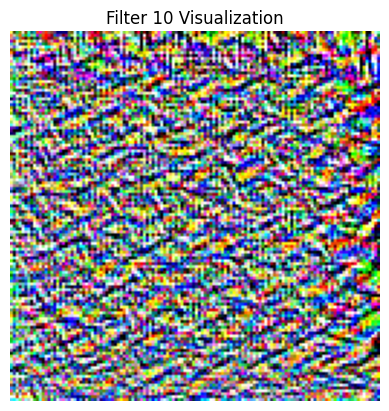

In [11]:
import torch
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt

#  Use a lighter pretrained model (AlexNet)
model = models.alexnet(pretrained=True)
model.eval()

#  Select a layer & filter (simpler conv layer)
layer_idx = 3   # early conv layer
filter_idx = 10 # visualize filter 10

#  Random input image
img = torch.randn(1, 3, 128, 128, requires_grad=True)  # smaller size

#  Optimizer
optimizer = torch.optim.Adam([img], lr=0.2)

# Gradient ascent (fewer steps)
for step in range(10):  
    optimizer.zero_grad()
    
    x = img
    for i, layer_module in enumerate(model.features):
        x = layer_module(x)
        if i == layer_idx:
            break
    
    loss = -x[0, filter_idx].mean()
    loss.backward()
    optimizer.step()
    img.data = torch.clamp(img.data, -1.5, 1.5)
    
    print(f"Step {step+1}, Loss: {loss.item():.4f}")

#  Convert tensor to image
def tensor_to_image(tensor):
    img = tensor.detach().clone()
    img = img.squeeze(0).permute(1, 2, 0)
    img = (img - img.min()) / (img.max() - img.min())
    return img

plt.imshow(tensor_to_image(img))
plt.title(f"Filter {filter_idx} Visualization")
plt.axis("off")
plt.show()

# 🌟 Grad-CAM 

## 🧾 Introduction

Gradient-weighted Class Activation Mapping (Grad-CAM) is a technique in deep learning (especially CNNs) to help **visualize and understand** decisions made by models.  
It produces a heatmap overlay on images, showing which parts of an image influenced the model’s prediction the most. 


## 🔍 What is Grad-CAM?

- Grad-CAM stands for **Gradient-weighted Class Activation Mapping**.  
- It’s a class-discriminative localization method: highlights image regions relevant to the model’s prediction for a specific class, without needing architectural changes. 
- Works by analyzing gradients flowing into the model’s **last convolutional layer**. These gradients are used to weight feature maps, producing a heatmap. 


## ⚖️ Why is Grad-CAM Needed?

- CNNs are powerful, but often opaque (“black boxes”). Grad-CAM offers interpretability. 
- Helps with **visual decision localization**: shows *where* the network is “looking” in the image.  
- Useful for debugging, trust, and improving model performance. 

## 🧰 Grad-CAM’s Role in CNN Interpretability

- Provides **heatmaps / class activation maps** that highlight important regions for a prediction. 
- Is class-discriminative: different classes produce different heatmaps.
- Retains original model architecture; no need to retrain or alter network.
- Bridges interpretability vs. performance trade-off: gives insight without sacrificing accuracy. 


## 🚀 Applications & Use Cases

- Interpreting neural network decisions in classification tasks.  
- Model debugging: spotting misclassifications, biases, or irrelevant features. 
- Medical imaging: highlighting lesions or anomalies in scans.
- Transfer learning / fine-tuning: understanding where pretrained models focus when adapted to new tasks.{index=14}  
- Tasks combining vision + language (e.g. image captioning, visual question answering): to explain visual components of predictions. 


## ⚠️ Challenges & Limitations

- Computational cost can be high, especially for large models or many images. 
- Localization may be coarse: heatmaps often highlight broad regions, not fine pixel-level details.  
- Dependence on the choice of layer: which layer’s activations are used has big effect on results. 
- Interpretability vs subjectivity: what is "important" is partly subjective, and visualizations might be misleading if taken without context. 


## 🧠 Key Takeaways

- Grad-CAM is a powerful tool for **visual interpretability** in CNNs.  
- It helps us zoom into the model’s decision-making by highlighting relevant image regions.  
- Useful in many fields: computer vision, healthcare, AI safety etc.  
- Always consider its limitations: resolution, computational cost, and subjectivity in interpretations.  

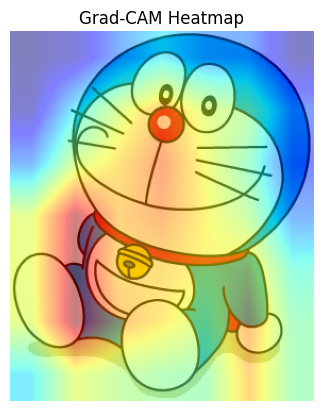

In [17]:
# Simple Grad-CAM Example (PyTorch)

import torch
import torch.nn.functional as F
from torchvision import models, transforms
from torchvision.models import ResNet18_Weights
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. Load pretrained model (ResNet18)
weights = ResNet18_Weights.DEFAULT
model = models.resnet18(weights=weights)
model.eval()

# 2. Load an example image
img_path = "Doraemon.png"   # replace with your image
img = Image.open(img_path).convert("RGB")

# Use fixed ImageNet normalization
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(img).unsqueeze(0)

# 3. Hook for feature maps and gradients
features = None
grads = None

def forward_hook(module, input, output):
    global features
    features = output

def backward_hook(module, grad_input, grad_output):
    global grads
    grads = grad_output[0]

# Register hooks on the last conv layer
target_layer = model.layer4[1].conv2
target_layer.register_forward_hook(forward_hook)
target_layer.register_full_backward_hook(backward_hook)

# 4. Forward + backward pass
output = model(input_tensor)
class_idx = output.argmax().item()
score = output[0, class_idx]
score.backward()

# 5. Compute Grad-CAM
weights = grads.mean(dim=(2,3), keepdim=True)   # average gradients
cam = (weights * features).sum(dim=1).squeeze()
cam = F.relu(cam)

# Normalize between 0-1
cam = cam.detach().numpy()
cam = (cam - cam.min()) / (cam.max() - cam.min())
cam = np.uint8(255 * cam)

# Resize CAM to match input image
cam = np.array(Image.fromarray(cam).resize(img.size, Image.BILINEAR))

# 6. Overlay heatmap
plt.imshow(img)
plt.imshow(cam, cmap="jet", alpha=0.5)
plt.title("Grad-CAM Heatmap")
plt.axis("off")
plt.show()

# 🔍 Saliency Maps in Convolutional Neural Networks (CNNs)

### 🖼️ What Are Saliency Maps?
- Highlight the regions in an image that **most influence a CNN's prediction**  
- Help visualize **where the model is “looking”** when making decisions 👀


### 🤔 Why Are Saliency Maps Important?
- **Interpretability**: Understand the decision-making process of neural networks  
- **Debugging**: Identify if the model is focusing on correct features 🛠️  
- **Trustworthiness**: Essential for critical applications like healthcare 🏥  
- **Transparency**: Explain AI predictions to non-technical users 💡


### 🔥 How Are Saliency Maps Generated?
- **Forward Pass**: Pass the input image through the CNN 🔁  
- **Backward Pass**: Compute gradients of the output with respect to the input image 🔙  
- **Visualization**: Absolute values of gradients are visualized as a heatmap 🌡️


### 📍 Applications of Saliency Maps
- **Object Localization**: Detect and highlight objects in images  
- **Feature Attribution**: Determine which parts of the input contribute most to predictions 🧩  
- **Model Debugging**: Check if the CNN is focusing on relevant features 🐞  
- **Explainable AI (XAI)**: Make AI decisions transparent and understandable 🌟  


### 🌀 Limitations of Saliency Maps
- **Noisy Gradients**: Visualizations can be noisy and hard to interpret  
- **Context Loss**: May not capture complex relationships in the data 🧠  
- **Model Dependency**: Results vary across different CNN architectures 🔄  


### 💡 Key Takeaways
- Saliency maps provide **visual explanations** of CNN predictions  
- Useful for **debugging, interpretability, and trust**  
- Have limitations and should be complemented with other explainability methods ⚖️  


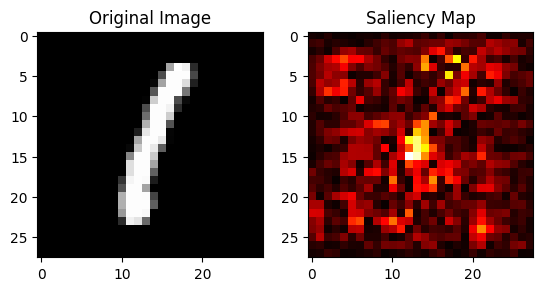

In [13]:
# 🔍 Saliency Maps in CNNs (PyTorch)

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Load Data (MNIST)

transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# 2. Define Simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.adaptive_avg_pool2d(x, (5, 5))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

# 3. Get One Image
images, labels = next(iter(dataloader))
images.requires_grad_()  # Enable gradient tracking

# 4. Forward Pass
outputs = model(images)
score, predicted_class = torch.max(outputs, 1)


# 5. Compute Gradients
model.zero_grad()
score.backward()  # Backprop
saliency = images.grad.data.abs().squeeze().numpy()  # absolute value of gradient


# 6. Show Results
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(images.squeeze().detach().numpy(), cmap="gray")
ax1.set_title("Original Image")

ax2.imshow(saliency, cmap="hot")
ax2.set_title("Saliency Map")
plt.show()